In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive/My\ Drive/UFO

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
complete.csv  scrubbed.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [0]:
data = pd.read_csv(r'/content/gdrive/My Drive/UFO/complete.csv',error_bad_lines=False)
data.info()

b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\nSkipping line 9571: expected 11 fields, saw 12\nSkipping line 9620: expected 11 fields, saw 12\nSkipping line 9751: expected 11 fields, saw 12\nSkipping line 10157: expected 11 fields, saw 12\nSkipping line 10427: expected 11 fields, saw 12\nSkipping line 12035: expected 11 fiel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
datetime                88679 non-null object
city                    88679 non-null object
state                   81270 non-null object
country                 76314 non-null object
shape                   85757 non-null object
duration (seconds)      88677 non-null object
duration (hours/min)    85660 non-null object
comments                88644 non-null object
date posted             88679 non-null object
latitude                88679 non-null object
longitude               88679 non-null float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


b'Skipping line 65881: expected 11 fields, saw 12\nSkipping line 66093: expected 11 fields, saw 12\nSkipping line 66095: expected 11 fields, saw 12\nSkipping line 66476: expected 11 fields, saw 12\nSkipping line 66549: expected 11 fields, saw 12\nSkipping line 66550: expected 11 fields, saw 12\nSkipping line 68102: expected 11 fields, saw 12\nSkipping line 69441: expected 11 fields, saw 12\nSkipping line 70104: expected 11 fields, saw 12\nSkipping line 70452: expected 11 fields, saw 12\nSkipping line 70642: expected 11 fields, saw 12\nSkipping line 70644: expected 11 fields, saw 12\nSkipping line 70716: expected 11 fields, saw 12\nSkipping line 71345: expected 11 fields, saw 12\nSkipping line 71634: expected 11 fields, saw 12\nSkipping line 72091: expected 11 fields, saw 12\nSkipping line 72119: expected 11 fields, saw 12\nSkipping line 73543: expected 11 fields, saw 12\nSkipping line 74654: expected 11 fields, saw 12\nSkipping line 74785: expected 11 fields, saw 12\nSkipping line 7491

In [0]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [0]:
data = data.rename(columns = {'longitude ':'longitude' })
data['latitude'] = pd.to_numeric(data['latitude'], errors = 'coerce')
data['datetime'] = pd.to_datetime(data['datetime'], errors = 'coerce')
data['city'] = data['city'].str.title()
data['state'] = data['state'].str.upper()
data['country'] = data['country'].str.upper()
import re
data['city'] = data['city'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
data['city'] = data['city'].apply(lambda x: x.strip())
data.loc[(data['state'].isin(states)),'country'] = 'US'

In [0]:
data.insert(1,'year',data['datetime'].dt.year)
data.insert(1,'month',data['datetime'].dt.month)
data.insert(1,'day',data['datetime'].dt.day)

data = data.fillna(value=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 14 columns):
datetime                88679 non-null object
day                     88679 non-null float64
month                   88679 non-null float64
year                    88679 non-null float64
city                    88679 non-null object
state                   88679 non-null object
country                 88679 non-null object
shape                   88679 non-null object
duration (seconds)      88679 non-null object
duration (hours/min)    88679 non-null object
comments                88679 non-null object
date posted             88679 non-null object
latitude                88679 non-null float64
longitude               88679 non-null float64
dtypes: float64(5), object(9)
memory usage: 9.5+ MB


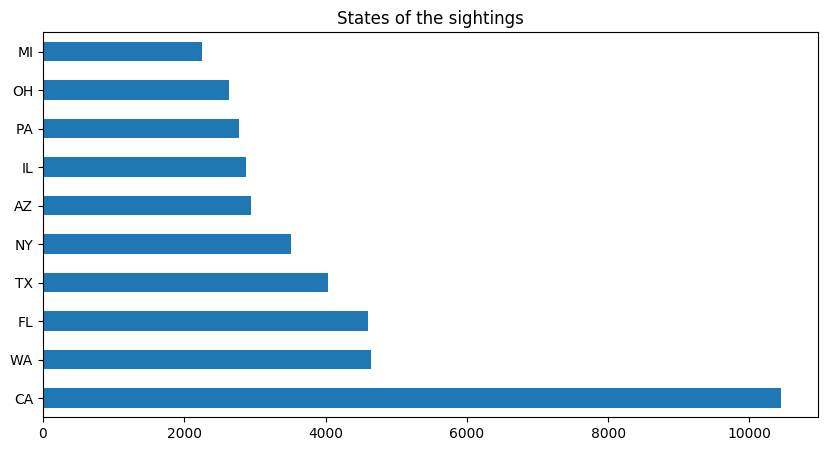

In [0]:

data[data['country']=='US']['state'].value_counts().head(10).plot(kind='barh', figsize=(10,5), title='States of the sightings' )

In [0]:
us_data = data[data['country']=='US'].copy()
gb_data = data[data['country']=='GB'].copy()
ca_data = data[data['country']=='CA'].copy()
au_data = data[data['country']=='AU'].copy()
de_data = data[data['country']=='DE'].copy()
un_data = data[data['country']==0].copy()

In [0]:
us_counts = us_data['city'].value_counts()
gb_counts = gb_data['city'].value_counts()
ca_counts = ca_data['city'].value_counts()
au_counts = au_data['city'].value_counts()
de_counts = de_data['city'].value_counts()
un_counts = un_data['city'].value_counts()

In [0]:
us_data = us_data[us_data['day']!=0]

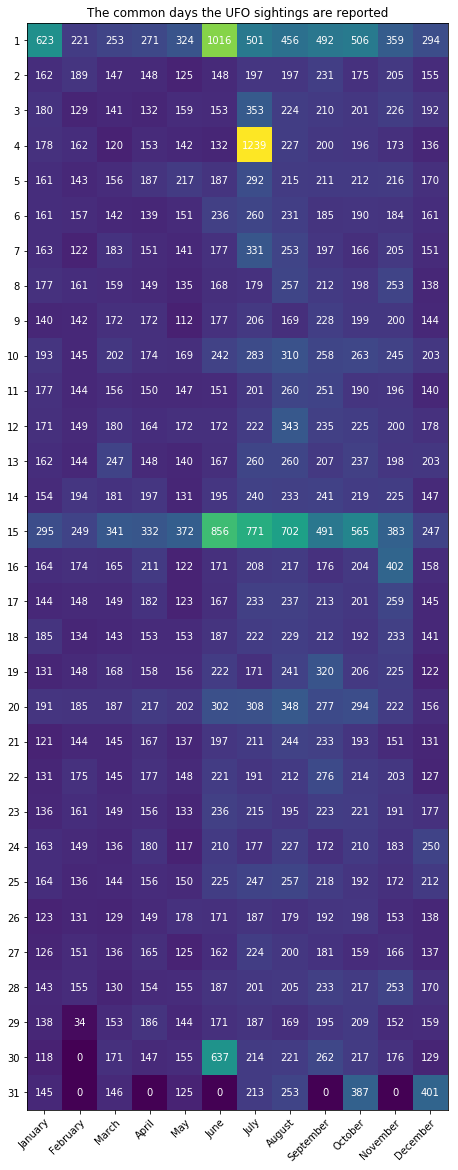

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
days = list(range(1,32))
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
density = np.zeros((31,12))
for index,row in us_data.iterrows():
    density[int(row['day']-1),int(row['month']-1)]+=1

fig,ax = plt.subplots()
im = ax.imshow(density)
ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(days)))
ax.set_xticklabels(months)
ax.set_yticklabels(days)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(days)):
    for j in range(len(months)):
        text = ax.text(j, i, int(density[i, j]),
                       ha="center", va="center", color="w")
ax.set_title("The common days the UFO sightings are reported")
#fig.tight_layout()
fig.set_size_inches(10, 20, forward=True)
plt.show()


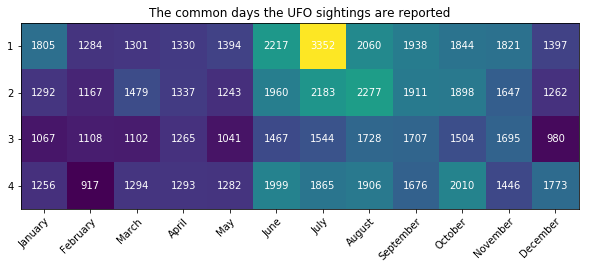

In [0]:
days = list(range(1,5))
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
density = np.zeros((4,12))
for index,row in us_data.iterrows():
    if int(row['day']-1)<8:
        density[0,int(row['month']-1)]+=1
    elif int(row['day']-1)<15:
        density[1,int(row['month']-1)]+=1
    elif int(row['day']-1)<22:
        density[2,int(row['month']-1)]+=1
    else:
        density[3,int(row['month']-1)]+=1

fig,ax = plt.subplots()
im = ax.imshow(density)
ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(days)))
ax.set_xticklabels(months)
ax.set_yticklabels(days)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(days)):
    for j in range(len(months)):
        text = ax.text(j, i, int(density[i, j]),
                       ha="center", va="center", color="w")
ax.set_title("The common days the UFO sightings are reported")
#fig.tight_layout()
fig.set_size_inches(10, 20, forward=True)
plt.show()


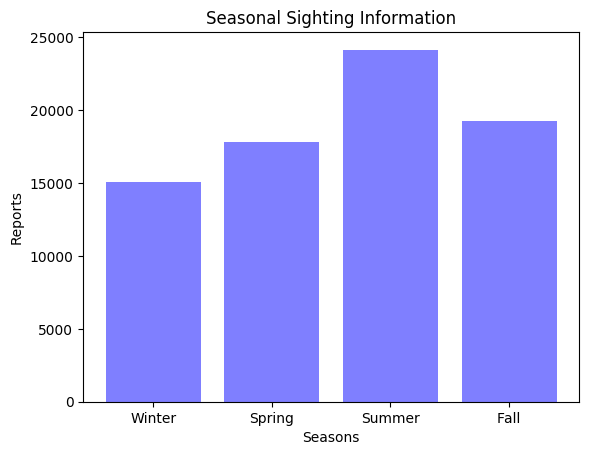

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
winter = len(us_data[us_data['month'].isin([1,2,3])])
spring = len(us_data[us_data['month'].isin([4,5,6])])
summer = len(us_data[us_data['month'].isin([7,8,9])])
fall = len(us_data[us_data['month'].isin([10,11,12])])

objects = ('Winter','Spring','Summer','Fall')
y_pos = np.arange(len(objects))
performance = [winter,spring,summer,fall]

plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)
plt.ylabel('Reports')
plt.xlabel('Seasons')
plt.title('Seasonal Sighting Information')

plt.show()


In [0]:
min(list(us_data['year'].unique()))

1910.0

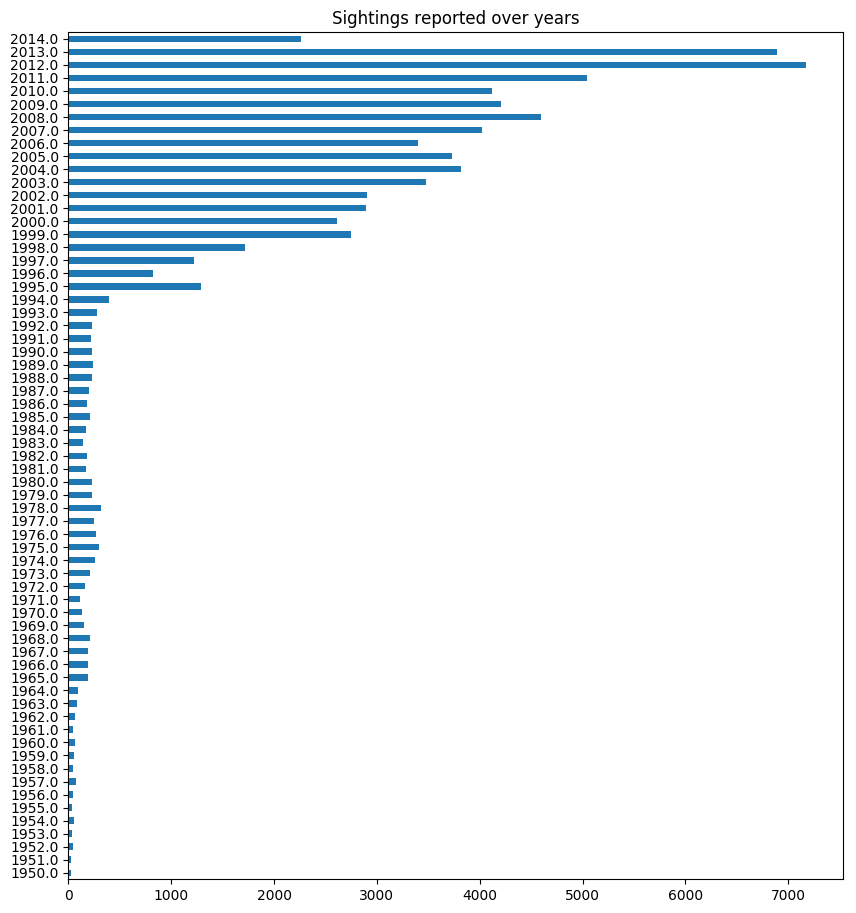

In [0]:
us_data[us_data['year']>1949]['year'].value_counts().sort_index().plot(kind='barh', figsize=(10,11), title='Sightings reported over years')

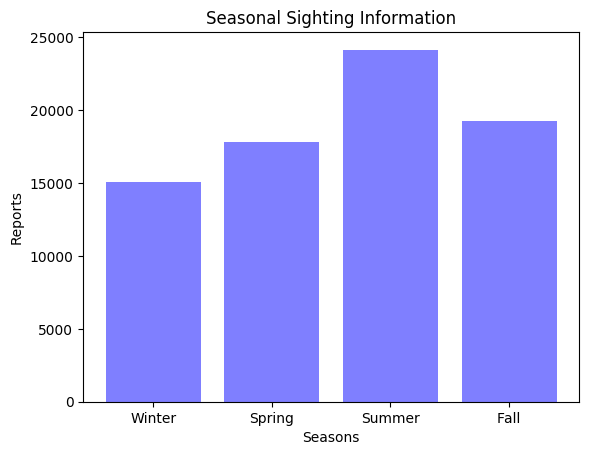

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
winter = len(us_data[us_data['month'].isin([1,2,3])])
spring = len(us_data[us_data['month'].isin([4,5,6])])
summer = len(us_data[us_data['month'].isin([7,8,9])])
fall = len(us_data[us_data['month'].isin([10,11,12])])

objects = ('Winter','Spring','Summer','Fall')
y_pos = np.arange(len(objects))
performance = [winter,spring,summer,fall]

plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)
plt.ylabel('Reports')
plt.xlabel('Seasons')
plt.title('Seasonal Sighting Information')

plt.show()


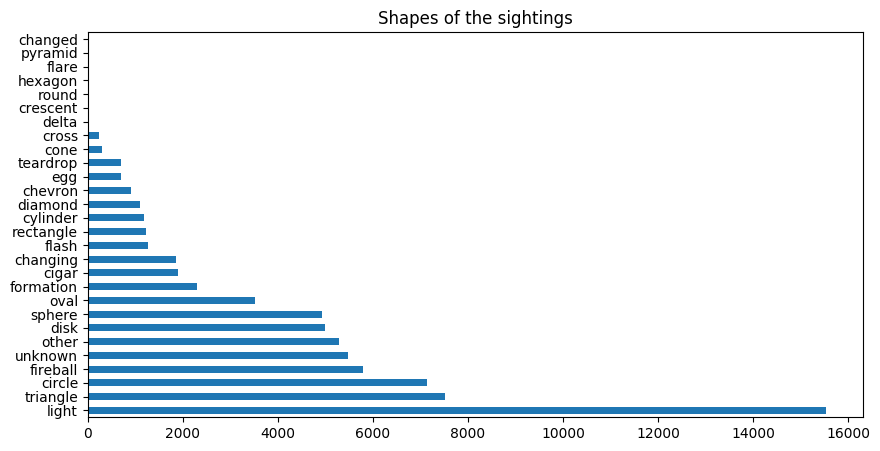

In [0]:
us_data[(us_data['year']>1949) & (us_data['shape']!=0)]['shape'].value_counts().plot(kind='barh', figsize=(10,5), title='Shapes of the sightings' )

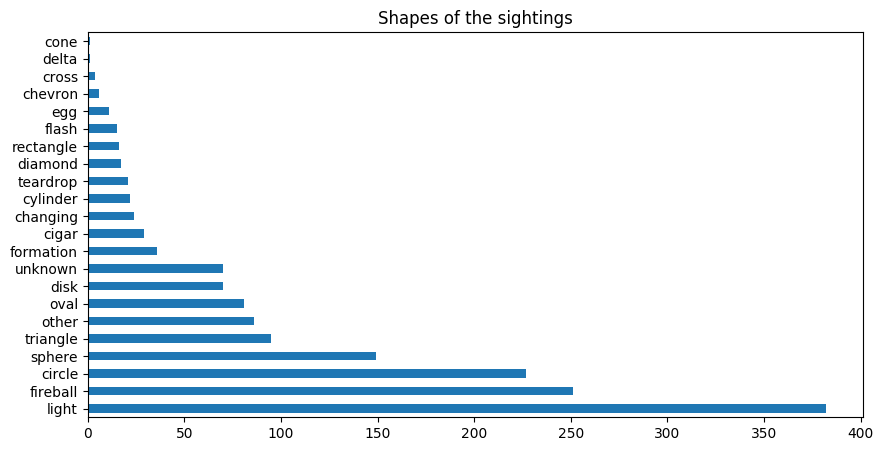

In [0]:
us_data[(us_data['year']>1949) & (us_data['shape']!=0) & (((us_data['day']==4) & (us_data['month']==7)) | ((us_data['day']==31) & (us_data['month']==12)))]['shape'].value_counts().plot(kind='barh', figsize=(10,5), title='Shapes of the sightings' )

In [0]:
from nltk.corpus import stopwords
sw = list(stopwords.words('english'))
us_data['comments'] = us_data['comments'].apply(lambda x : ' '.join([item for item in str(x) if item not in sw]))

pd.Series(us_data[us_data['comments']!=0]['comments'].split()).value_counts()[:50]

LookupError: ignored